For this homework assignment, you are to submit a **single** ipynb file. Use the provided ipynb file to keep the same formatting for each question. In the ipynb file name, replace "NAME" with your first name. Unless otherwise specified, present your code as well as the output in your report. It is the student's responsibility to make sure the ipynb file runs when submitted. This assignment is worth 45 points.

#1: MNIST *(24 points)*

In this problem, we will try to be classifying images of handwritten digits. Thus, our data is images all stored as a huge matrix of pixel values.

We will need the `keras` package contained inside of `tensorflow`.

In [2]:
import keras
from tensorflow.keras.datasets import mnist,fashion_mnist

(images_full, labels_full), (images_test, labels_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


How many images are there in total? *(2 points)*

*(Hint: `images_full` is a big vector of square matrices...)*

In [5]:
images_full.shape

(60000, 28, 28)

There are 60000 images in total.

What is the size of each image? What do you think the values represent? *(2 points)*

In [6]:
images_full.shape

(60000, 28, 28)

The size of each image is a 28 by 28 matrix.

We can use the following code to see a few of our images! Can you identify some of these numbers? *(2 points)*

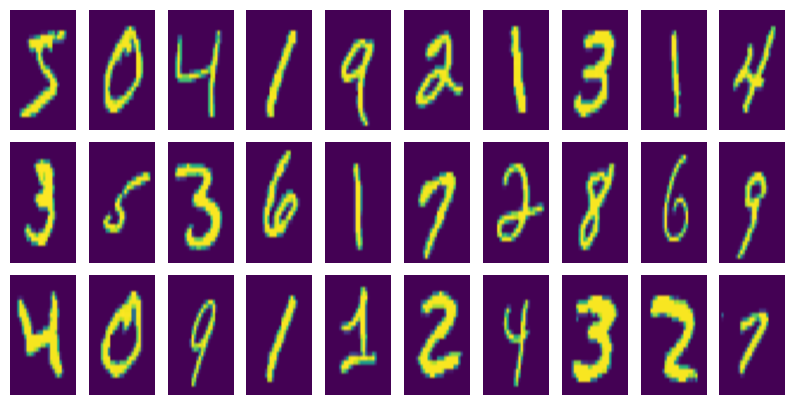

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,10,figsize=(10,5))
axes = axes.ravel()

for i in range(30):
  axes[i].imshow(images_full[i], aspect='auto')
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.1)
plt.show()

Write some code that displays the outputs of each of these images (`labels_full`) in the same layout as above. (You could try using a matrix!) *(4 points)*

In [8]:
import numpy as np
numat=np.zeros((3,10))

for i in range(0,30):
  if i<10:
    numat[0][i]=labels_full[i]
  if i<20 and i>=10:
    numat[1][i-10]=labels_full[i]
  if i<30 and i>=20:
    numat[2][i-20]=labels_full[i]

numat

array([[5., 0., 4., 1., 9., 2., 1., 3., 1., 4.],
       [3., 5., 3., 6., 1., 7., 2., 8., 6., 9.],
       [4., 0., 9., 1., 1., 2., 4., 3., 2., 7.]])

Since the inputs are stored in a 3-dimensional matrix, we will need to reshape the data before we can use it. Use the following code to reshape the data.

Then, create a `MLPClassifier` model with the `adam` solver and a maximum number of iterations set to 1000. Then fit the model with `images_full_flattened` and `labels_full`. *(6 points)*

*(Remember that neural networks take a long time to build. I have ran this chunk a few times, each run between 3 and 6 minutes. So be patient!)*

In [9]:
from sklearn.neural_network import MLPClassifier
images_full_flattened = images_full.reshape(images_full.shape[0], -1)
mlp=MLPClassifier(solver='adam', max_iter=1000)
mlp=mlp.fit(images_full_flattened,labels_full)

Compute the simple accuracy of your model using the test set. *(4 points)*

In [ ]:
images_test_flattened = images_test.reshape(images_test.shape[0], -1)
mlp.score(images_test_flattened,labels_test)

0.9642

Write some code that will find an index where `labels_test` and the predictions do not agree. Print the image, the correct label, and the predicted label. Do you see why the model predicted it wrong? (Depending on the image, it may not make sense, but it might be a really poorly drawn number!)  *(4 points)*

4 9


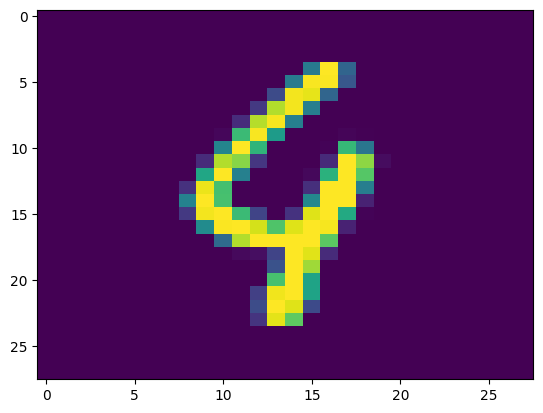

In [ ]:
predmlp=mlp.predict(images_test_flattened)
for i in range(0,predmlp.size):
  if labels_test[i]!=predmlp[i]:
    plt.imshow(images_test[i], aspect='auto')
    print(labels_test[i],predmlp[i])
    break


The 4 is pourly drawn to where it looks similar to a 9 so the code doesn't recognize its a 4 but rather as a 9.

#2: Fashion MNIST *(21 points)*

Now let us consider the `fashion_mnist` data set. Show the first 25 images of the test set to see what this data set is attempting to classify. When calling the image using `imshow` like before, include an input to that function of `cmap='binary'`, changing the color scale to a binary scale. *(4 points)*

In [3]:
(fash_images, fash_labels), (fash_test, fash_labels_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


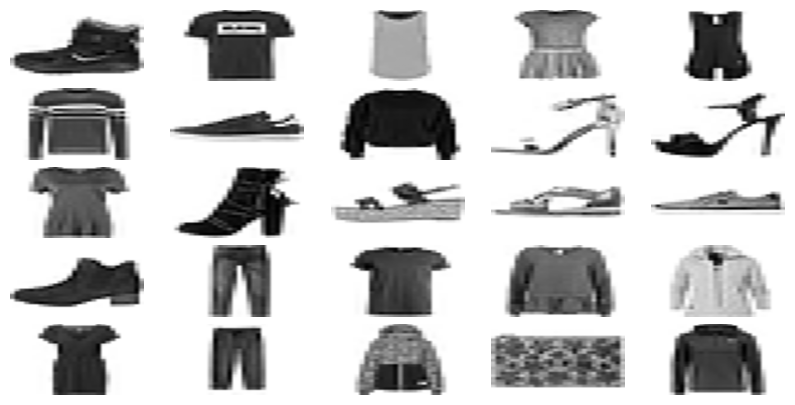

In [10]:
fig, axes = plt.subplots(5,5,figsize=(10,5))
axes = axes.ravel()

for i in range(25):
  axes[i].imshow(fash_images[i], aspect='auto',cmap="binary")
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.1)
plt.show()

The class names are stored as values between 0 and 9. The following list is the actual class name instead of it's number.

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Flatten the input set and build an MLPCLassifier neural network to predict classes of clothing. For this model, you should have two hidden layers. The first layer should have 25 nodes and the second should have 15. Continue using the `adam` solver with 1000 iterations. *(8 points)*

In [15]:
fash_images_flattened = fash_images.reshape(fash_images.shape[0], -1)
mlp1=MLPClassifier(solver='adam', max_iter=1000,hidden_layer_sizes=[25,15])
mlp1=mlp1.fit(fash_images_flattened,fash_labels)

Construct a confusion matrix using `ConfusionMatrixDisplay` for the test set. This function has an optional input `display_labels` that you can set to a list of names for each class. Use this label so that the columns/rows identify articles of clothing. *(3 points)*

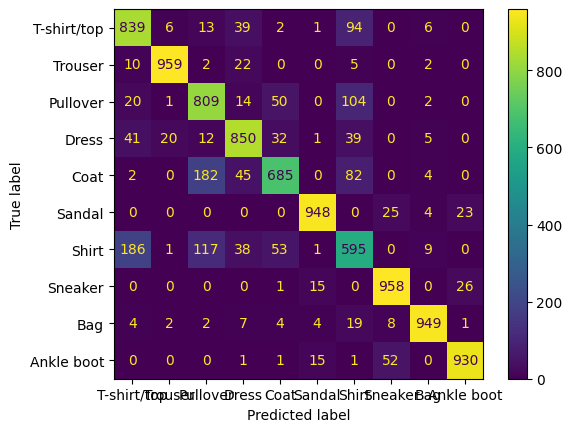

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
fash_test_flattened = fash_test.reshape(fash_test.shape[0], -1)
fashpred=mlp1.predict(fash_test_flattened)
cm=confusion_matrix(fash_labels_test, fashpred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names).plot()

Which article of clothing does the model correctly identify more often? *(1 point)*

Which article of clothing does the model incorrectly indentify more often? *(1 point)*

The article of clothing prodicted correctly most often are sneakers.
The article of clthing that the motel incorretly identifies most often are 595.

To see the coefficients and biases for the model, use `coefs_` and `intercept_` respectively. Display the coefficients of your model. Explain why there are three arrays, find the shapes of each array, and explain the dimensions of the latter two arrays.  *(4 points)*

In [28]:
coefs=mlp1.coefs_
ints=mlp1.intercepts_
#coefs

print(np.array(coefs[0]).shape)
print(np.array(coefs[1]).shape)
print(np.array(coefs[2]).shape)


(784, 25)
(25, 15)
(15, 10)


There are three arrays because each represents the wieghts connecting the neurons of each layer, with the first array representing the connection between the input layer and the 1rst hidden layer, the second array representing the 1rst hidden layer connectng to the second hidden layer, and the third array representing the second hidden layer connecting to the output layer. The second array has dimensions of 25 by 15 because it is connecting first layer's neurons to the second layer' and the third array has dimensions of 15 by 10 because it is connecting the second layer's neurons to the output layer's.